# Basic Analysis

## Import Libraries

In [2]:
# Custom imports
from statisco.statistics import closingReturns, mean, variance, stdDev, covariance, correlation
import matplotlib.pyplot as plt

# Foreing Libraries
import yfinance as yf
import numpy as np
import math

In [3]:
msft = yf.download("MSFT", period="1mo")
aapl = yf.download("AAPL", period="1mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
msft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-08,361.679993,363.869995,360.549988,363.200012,362.464325,26767800
2023-11-09,362.299988,364.790009,360.359985,360.690002,359.959412,24847300
2023-11-10,361.489990,370.100006,361.070007,369.670013,368.921234,28042100
2023-11-13,368.220001,368.470001,365.899994,366.679993,365.937256,19986500
2023-11-14,371.010010,371.950012,367.350006,370.269989,369.519989,27683900


## Statistics

### Close Returns

In [4]:
msft["MyCloseReturns"] = closingReturns(msft["Adj Close"])

In [5]:
aapl["MyCloseReturns"] = closingReturns(aapl["Adj Close"])

In [6]:
msft["CloseReturns"] = msft["Adj Close"].pct_change()

In [7]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns
Date,,,,,,,,
2023-11-07,359.399994,362.459991,357.630005,360.529999,359.799744,25833900,0.000000,NaN
2023-11-08,361.679993,363.869995,360.549988,363.200012,362.464325,26767800,0.007406,0.007406
2023-11-09,362.299988,364.790009,360.359985,360.690002,359.959412,24847300,-0.006911,-0.006911
2023-11-10,361.489990,370.100006,361.070007,369.670013,368.921234,28042100,0.024897,0.024897
2023-11-13,368.220001,368.470001,365.899994,366.679993,365.937256,19986500,-0.008088,-0.008088


### Mean

In [8]:
defaultMean = msft["MyCloseReturns"].mean()
myMean = mean(msft["MyCloseReturns"])
myMeanAapl = mean(aapl["MyCloseReturns"])

print(f"default pandas mean: {defaultMean}")
print(f"myMean: {myMean}")

default pandas mean: 0.0011897172488205695
myMean: 0.0011897172488205695


### Variance

In [9]:
defaultVariance = np.var(msft["MyCloseReturns"])
myVariance = variance(msft["MyCloseReturns"], myMean)
myVarianceAapl = variance(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy variance: {defaultVariance}")
print(f"myMean: {myVariance}")

default numpy variance: 0.00013256809269148416
myMean: 0.0001325680926914842


### Std Dev

In [10]:
defaultStandardDeviation = msft["MyCloseReturns"].std()
myStandardDeviation = stdDev(msft["MyCloseReturns"], myMean)
myStandardDeviationAapl = stdDev(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy std dev: {defaultStandardDeviation}")
print(f"myStandardDeviation: {myStandardDeviation}")

default numpy std dev: 0.011784772335948043
myStandardDeviation: 0.011513821810827376


### Covariance

In [11]:
covariance_matrix = np.cov(msft["MyCloseReturns"], aapl["MyCloseReturns"])
covariance_value = covariance_matrix[0, 1]

myCovariance = covariance(msft["MyCloseReturns"], myMean, aapl["MyCloseReturns"], myMeanAapl)

print(f"defualt covariance: {covariance_value}")
print(f"myCovariance: {myCovariance}")

defualt covariance: 7.747994065058295e-05
myCovariance: 7.747994065058295e-05


### Correlation

In [12]:
correlation_coefficient = np.corrcoef(msft["MyCloseReturns"], aapl["MyCloseReturns"])[0, 1]
myCorrelation = correlation(myCovariance, myVariance, myVarianceAapl)

In [15]:
print(f"defualt correlation: {correlation_coefficient}")
print(f"myCorrelation: {myCorrelation}")

defualt correlation: 0.7481481641011334
myCorrelation: 0.7837742671535681


## Financial Calculations

In [1]:
from statisco.finance import compoundInterest, moneyMadeInAYear, compoundInterestTime, expectedValue

### Compound Interest
- **Principal**: Initial amount of money invested or loaned.
- **Interest Rate**: The percentage of the principal that is charged or paid over a certain period. An interest rate of 5% means that 5% of the principal will be added to or deducted from the principal each period.
- **Time Period**: Duration for which the money is invested or borrowed.

In [2]:
def compound_interest(principal, interest_rate, time_period):
    # Check if the inputs are valid
    if time_period < 0:
        raise ValueError("Time cannot be negative.")
    
    # Calculate compound interest using the formula A = P * (1 + r)^t
    future_value = principal * (1 + interest_rate) ** time_period
    return future_value

In [3]:
principal = 1000.0
itr = 0.05
t = 2.0
cmpi = compoundInterest(principal, itr, t)
default_cmpi = compound_interest(principal, itr, t)
print(f"compound interest: {cmpi}")
print(f"default compound interest: {default_cmpi}")

compound interest: 1102.5
default compound interest: 1102.5


### Money Made in a Year

In [4]:
def money_made_in_a_year(P_t, r_t, t_t):
    return r_t * (P_t * (1 + r_t) ** t_t)

principal = 1000.0
interest_rate = 0.05
time_period = 2.0

mmiay = moneyMadeInAYear(principal, itr, t)
default_mmiay = money_made_in_a_year(principal, itr, t)
print(f"Money Made in a Year: {mmiay}")
print(f"default money made in a year: {default_mmiay}")

Money Made in a Year: 55.125
default money made in a year: 55.125


### Compound Interest

In [8]:
def compound_interest_time(r_t):
    """
    Calculate the time it takes for compound interest to reach a factor.
    """
    return -math.log(r_t) / math.log(1 + r_t)

interest_rate = 0.05  # Example interest rate (5%)
compound_time = compound_interest_time(interest_rate)
cmpt = compoundInterestTime(interest_rate)

print(f"Default compound interest time: {compound_time} years")
print(f"cmpt: {cmpt} years")

Default compound interest time: 61.40033190195481 years
cmpt: 61.40033190195481 years


### Expected Value

In [6]:
def expected_value(avg_loss, prob_loss, avg_gain, prob_gain):return (avg_loss * prob_loss) + (avg_gain * prob_gain)

# Example usage:
avg_loss = -10.0   # Average loss amount
prob_loss = 0.3    # Probability of a loss
avg_gain = 20.0    # Average gain amount
prob_gain = 0.7    # Probability of a gain

defaultEV = expected_value(avg_loss, prob_loss, avg_gain, prob_gain)
EV = expectedValue(avg_loss, prob_loss, avg_gain, prob_gain)
print(f"Default expected value: {defaultEV} ")
print(f"expected value: {EV}")

Default expected value: 11.0 
expected value: 11.0


## Indicators

In [5]:
from statisco.indicators.MAs import SMA

In [6]:
def calculate_sma(data, window):
    sma = np.convolve(data, np.ones(window)/window, mode='valid')
    return sma

In [7]:
window_size = 3
msft['SMA'] = msft['Close'].rolling(window=window_size).mean()
msft['mySMA'] = SMA(msft['Close'], 3)

In [8]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,SMA,mySMA
Date,,,,,,,,
2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400,377.423340,377.423340
2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300,374.186676,374.186676
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000,372.056671,372.056671
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100,370.153330,370.153330
2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23099800,370.756663,370.756663


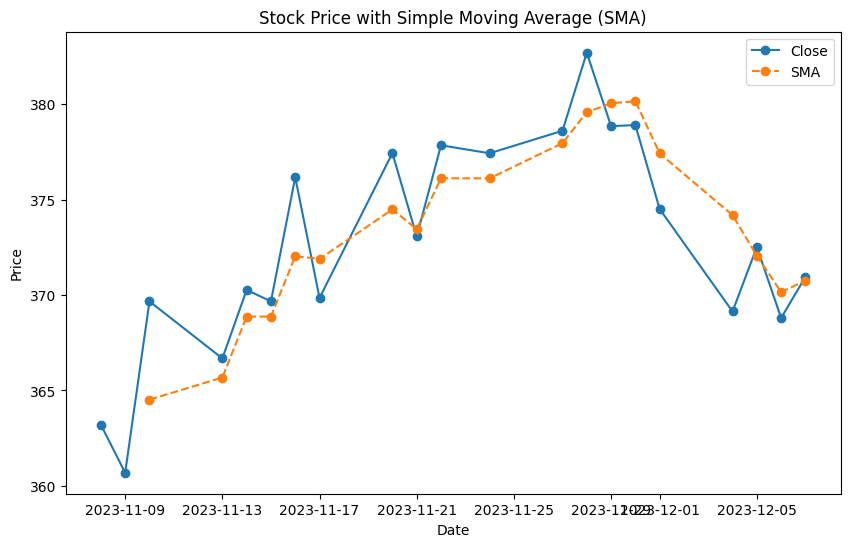

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index, msft['mySMA'], label='SMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()